# Name : Kishan Prajapati
# Date : 26th Feb 2025

## project-1 part-3

## Imported the Pandas library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Imports the csv file into a dataframe

In [6]:
n = pd.read_csv("D:/SPRING-2025/CMP-262-DATA-SCIENCE-PROGRAMMING/New folder (2)/Non-Major.csv")

# Questions To Answer

## 1.	Which advertisement methods have the lowest yield?

### For this question I will create a new data set that is a subset of the given set. it will be 'q1' 
#### The columns to use => 'How did you hear about County College of Morris  [CCM Web site]',
       'How did you hear about County College of Morris  [Billboard]',
       'How did you hear about County College of Morris  [Television]',
       'How did you hear about County College of Morris  [Radio]',
       'How did you hear about County College of Morris  [Social Media]',
       'How did you hear about County College of Morris  [Community Event]',
       'How did you hear about County College of Morris  [Family member or friend]',
       'How did you hear about County College of Morris  [Employer]',
       'How did you hear about County College of Morris  [Current student]',
       'How did you hear about County College of Morris  [Alumni]',
       'How did you hear about County College of Morris  [High School]',

In [10]:
q1 = n[['How did you hear about County College of Morris  [CCM Web site]',
       'How did you hear about County College of Morris  [Billboard]',
       'How did you hear about County College of Morris  [Television]',
       'How did you hear about County College of Morris  [Radio]',
       'How did you hear about County College of Morris  [Social Media]',
       'How did you hear about County College of Morris  [Community Event]',
       'How did you hear about County College of Morris  [Family member or friend]',
       'How did you hear about County College of Morris  [Employer]',
       'How did you hear about County College of Morris  [Current student]',
       'How did you hear about County College of Morris  [Alumni]',
       'How did you hear about County College of Morris  [High School]',]]

### this shows the column names for the dataset

In [12]:
q1.columns

Index(['How did you hear about County College of Morris  [CCM Web site]',
       'How did you hear about County College of Morris  [Billboard]',
       'How did you hear about County College of Morris  [Television]',
       'How did you hear about County College of Morris  [Radio]',
       'How did you hear about County College of Morris  [Social Media]',
       'How did you hear about County College of Morris  [Community Event]',
       'How did you hear about County College of Morris  [Family member or friend]',
       'How did you hear about County College of Morris  [Employer]',
       'How did you hear about County College of Morris  [Current student]',
       'How did you hear about County College of Morris  [Alumni]',
       'How did you hear about County College of Morris  [High School]'],
      dtype='object')

### Renaming the column names as they are too long to understand
### Keeping only the values that are inside the []

In [14]:
q1 = q1.rename(columns = {
    'How did you hear about County College of Morris  [CCM Web site]':'CCM Web site' ,
    'How did you hear about County College of Morris  [Billboard]' : 'Billboard',
    'How did you hear about County College of Morris  [Television]' : 'Television',
    'How did you hear about County College of Morris  [Radio]' : 'Radio',
    'How did you hear about County College of Morris  [Social Media]' : 'Social Media',
    'How did you hear about County College of Morris  [Community Event]' : 'Community Event',
    'How did you hear about County College of Morris  [Family member or friend]' : 'Family member or Friend',
    'How did you hear about County College of Morris  [Employer]' : 'Employer',
    'How did you hear about County College of Morris  [Current student]' : 'Current Student',
    'How did you hear about County College of Morris  [Alumni]' : 'Alumini',
    'How did you hear about County College of Morris  [High School]' : 'High School'
})

##### Shows the new column names

In [16]:
q1.columns

Index(['CCM Web site', 'Billboard', 'Television', 'Radio', 'Social Media',
       'Community Event', 'Family member or Friend', 'Employer',
       'Current Student', 'Alumini', 'High School'],
      dtype='object')

In [17]:
q1.apply(pd.Series.value_counts)

,CCM Web site,Billboard,Television,Radio,Social Media,Community Event,Family member or Friend,Employer,Current Student,Alumini,High School
No,54,84,91,92.0,66,76,22,76,46,66,36
Yes,38,8,1,NaN,26,16,70,16,46,26,56


### The Above Code gives you the total count for the responses that were Gathered
### Now saving the table into another DataFrame named t1

In [19]:
t1 = q1.apply(pd.Series.value_counts)

In [20]:
t1

,CCM Web site,Billboard,Television,Radio,Social Media,Community Event,Family member or Friend,Employer,Current Student,Alumini,High School
No,54,84,91,92.0,66,76,22,76,46,66,36
Yes,38,8,1,NaN,26,16,70,16,46,26,56


### As there were no response for yes in the Radio it shows NaN
### In the Next code We will Try and Remove the NaN

In [22]:
t1.fillna(0, inplace=True)

In [23]:
t1

,CCM Web site,Billboard,Television,Radio,Social Media,Community Event,Family member or Friend,Employer,Current Student,Alumini,High School
No,54,84,91,92.0,66,76,22,76,46,66,36
Yes,38,8,1,0.0,26,16,70,16,46,26,56


## Now creating lists using numpy for X and Y components of the Graph

In [25]:
table1 = t1.T

In [26]:
table1

,No,Yes
CCM Web site,54.0,38.0
Billboard,84.0,8.0
Television,91.0,1.0
Radio,92.0,0.0
Social Media,66.0,26.0
Community Event,76.0,16.0
Family member or Friend,22.0,70.0
Employer,76.0,16.0
Current Student,46.0,46.0
Alumini,66.0,26.0


In [27]:
table1 = table1.reset_index()

In [28]:
table1 = table1.sort_values(by='Yes')

In [29]:
n1 = table1[['index','Yes']]

In [30]:
x1 = n1['index'].to_numpy()
y1 = n1['Yes'].to_numpy()

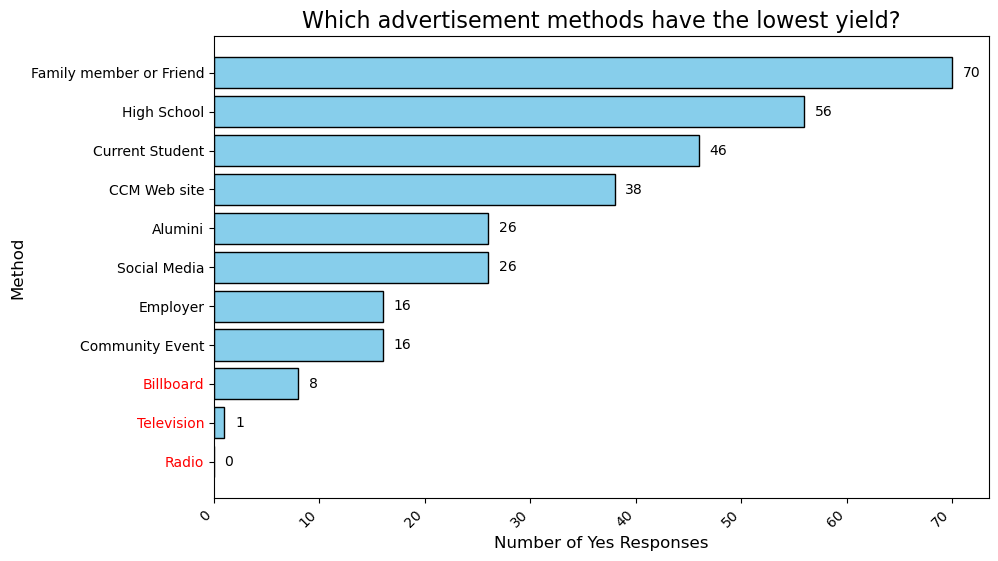

In [31]:
plt.figure(figsize=(10, 6))
plt.title("Which advertisement methods have the lowest yield?", fontsize=16)
plt.xlabel("Number of Yes Responses", fontsize=12)
plt.ylabel("Method", fontsize=12)
plt.xticks(rotation=45, ha='right')
bars = plt.barh(x1,y1,color='skyblue', edgecolor='black')
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # X-coordinate (to the right of the bar)
        bar.get_y() + bar.get_height()/2,  # Y-coordinate (centered on the bar)
        f'{int(bar.get_width())}',  # Text to display
        ha='left', va='center', fontsize=10
    )
threshold = 10
for tick_label, value in zip(plt.gca().get_yticklabels(), y1):
    if value < threshold:
        tick_label.set_color('red')  # Change to any color for low values
    else:
        tick_label.set_color('black')  # Default color for others


### As we can see, the Billboard, Television and Radio have the lowest Yeild

### so from above table we can say that Advertising using 'Radio' produces the lowest yeild

## 2.	Which events or activities at CCM Influences people to Enroll at CCM?

## Subsetting the needed columns for the question

In [36]:
q2 = n[['Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]',
       "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [TItan's Tuesday Virtual Information Session]",
  
    'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]']]

## Renaming the columns that are present, only using the values in []

In [38]:
q2 = q2.rename(columns ={ 'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]' : 'Open House',
 'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]' : 'Instant Decision Day',
 'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]':'On-Campus Information Session',
 "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [TItan's Tuesday Virtual Information Session]":"Titan's Tuesday Virtual Information Session",
 'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]':'Women Who Dare',
 'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]':'Regional College Fair'   
})

In [39]:
q2

,Open House,Instant Decision Day,On-Campus Information Session,Titan's Tuesday Virtual Information Session,Women Who Dare,Regional College Fair
0,Yes,Yes,No,No,No,Yes
1,No,No,No,No,No,No
2,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure
3,Yes,No,No,No,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
87,No,No,No,No,No,No
88,Yes,No,No,No,No,No
89,Yes,No,Yes,No,No,No
90,No,No,No,No,No,No


## Counting the Yes, No and Not Sure Values

In [41]:
t2 = q2.apply(pd.Series.value_counts)

In [43]:
table2 = t2.T

In [45]:
table2 = table2.reset_index()

In [47]:
table2.fillna(0, inplace=True)

In [49]:
table2 = table2.sort_values(by='Yes')

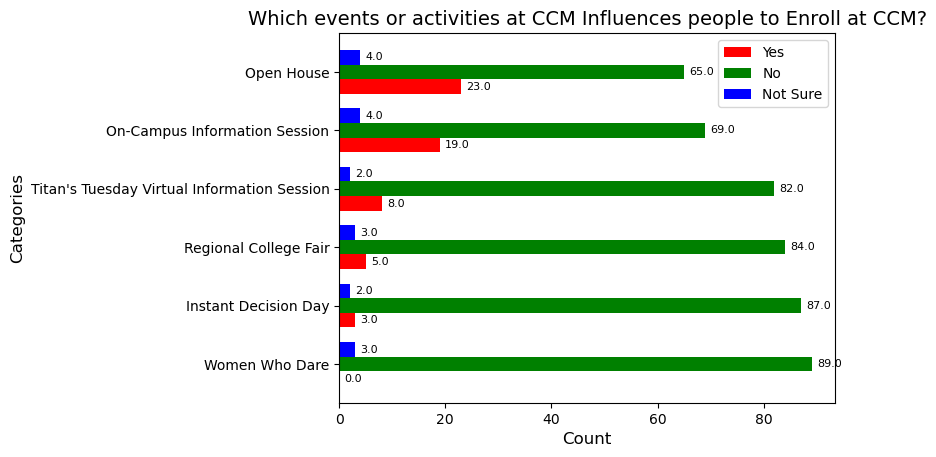

In [68]:
import matplotlib.pyplot as plt
import numpy as np

x2a = table2['Yes'].to_numpy()
x2b = table2['No'].to_numpy()
x2c = table2['Not Sure'].to_numpy()

y2 = table2['index'].to_numpy()

# Define the bar height
bar_height = 0.25

# Set positions for the bars
y = np.arange(len(y2))
a1 = y
a2 = y + bar_height
a3 = y + (2 * bar_height)

# Create the horizontal bar chart with different colors for each column
plt.barh(a1, x2a, height=bar_height, color='red', label='Yes')
plt.barh(a2, x2b, height=bar_height, color='green', label='No')
plt.barh(a3, x2c, height=bar_height, color='blue', label='Not Sure')

# Add counts on the bars
for i in range(len(y2)):
    plt.text(x2a[i] + 1, a1[i], str(x2a[i]), va='center', fontsize=8)
    plt.text(x2b[i] + 1, a2[i], str(x2b[i]), va='center', fontsize=8)
    plt.text(x2c[i] + 1, a3[i], str(x2c[i]), va='center', fontsize=8)

# Add titles and labels
plt.title('Which events or activities at CCM Influences people to Enroll at CCM?', fontsize=14)
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.yticks(y + bar_height, y2)  # Set the y-ticks to match the categories
plt.legend()

# Show the chart
plt.show()

### So the above table gives the comparision value Table

### 3. What motivated people to apply for non-major courses?

##### Subsetting the needed columns

In [70]:
q3 = n[['What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]',
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]',
       'What motivated you to seek a computing class at CCM? [Career Advancement]',
       'What motivated you to seek a computing class at CCM? [Career Change]',
       'What motivated you to seek a computing class at CCM? [Professional Development]',
       'What motivated you to seek a computing class at CCM? [Job Displacement]',
       'What motivated you to seek a computing class at CCM? [Relocation]',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]',
       'What motivated you to seek a computing class at CCM? [Financial]',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]',
       'What motivated you to seek a computing class at CCM? [Curiosity]']]

##### Renaming the columns by the values inside the []

In [73]:
q3 = q3.rename(columns = {"What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]":"It’s a required class for the degree I’m seeking",
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]':'To keep current in computing skills',
       'What motivated you to seek a computing class at CCM? [Career Advancement]':'Career Advancement',
       'What motivated you to seek a computing class at CCM? [Career Change]':'Career Change',
       'What motivated you to seek a computing class at CCM? [Professional Development]':'Professional Development',
       'What motivated you to seek a computing class at CCM? [Job Displacement]':'Job Displacement',
       'What motivated you to seek a computing class at CCM? [Relocation]':'Relocation',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]':'IT Industry Certifications',
       'What motivated you to seek a computing class at CCM? [Financial]':'Financial',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]':'Personal Enrichment',
       'What motivated you to seek a computing class at CCM? [Curiosity]':'Curiosity'})

##### Using the Count

In [76]:
q3.apply(pd.Series.value_counts)

,It’s a required class for the degree I’m seeking,To keep current in computing skills,Career Advancement,Career Change,Professional Development,Job Displacement,Relocation,IT Industry Certifications,Financial,Personal Enrichment,Curiosity
No,10,22,38,74,27,71,83,89,72,44,45
Yes,82,70,54,18,65,21,9,3,20,48,47


In [78]:
t3 = q3.apply(pd.Series.value_counts)

In [80]:
t3

,It’s a required class for the degree I’m seeking,To keep current in computing skills,Career Advancement,Career Change,Professional Development,Job Displacement,Relocation,IT Industry Certifications,Financial,Personal Enrichment,Curiosity
No,10,22,38,74,27,71,83,89,72,44,45
Yes,82,70,54,18,65,21,9,3,20,48,47


### The result is shown in the above table is the value counts that are given by the subsetted columns

In [83]:
n3 = t3.T

In [85]:
n3 = n3.reset_index()

In [87]:
n3 = n3.sort_values(by='Yes')

In [89]:
n3

,index,No,Yes
7,IT Industry Certifications,89,3
6,Relocation,83,9
3,Career Change,74,18
8,Financial,72,20
5,Job Displacement,71,21
10,Curiosity,45,47
9,Personal Enrichment,44,48
2,Career Advancement,38,54
4,Professional Development,27,65
1,To keep current in computing skills,22,70


In [91]:
#What motivated people to apply for non-major courses?

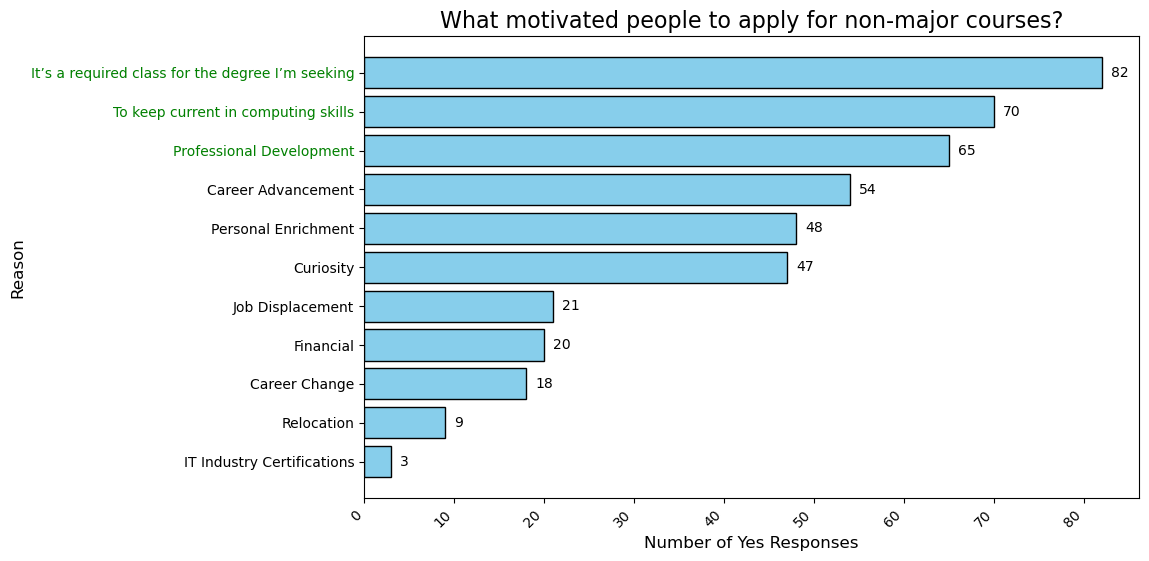

In [93]:
x3 = n3['index'].to_numpy()
y3 = n3['Yes'].to_numpy()
plt.figure(figsize=(10, 6))
plt.title("What motivated people to apply for non-major courses?", fontsize=16)
plt.xlabel("Number of Yes Responses", fontsize=12)
plt.ylabel("Reason", fontsize=12)
plt.xticks(rotation=45, ha='right')
bars = plt.barh(x3,y3,color='skyblue', edgecolor='black')
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # X-coordinate (to the right of the bar)
        bar.get_y() + bar.get_height()/2,  # Y-coordinate (centered on the bar)
        f'{int(bar.get_width())}',  # Text to display
        ha='left', va='center', fontsize=10
    )
threshold = 60
for tick_label, value in zip(plt.gca().get_yticklabels(), y3):
    if value > threshold:
        tick_label.set_color('green')  # Change to any color for low values
    else:
        tick_label.set_color('black')  # Default color for others


## Question 4 : Compare the gender demographics of the different classes who answered the survey.  Are there any significant differences? 

In [141]:
q4 = n[['Which course are you currently enrolled in?','Gender']]

In [143]:
q4 = q4.rename(columns = {"Which course are you currently enrolled in?":"Course"})

In [145]:
q4

,Course,Gender
0,CMP 126 Computer Technology and Applications,Prefer not to say
1,CMP 126 Computer Technology and Applications,Woman
2,CMP 126 Computer Technology and Applications,Man
3,CMP 126 Computer Technology and Applications,Man
4,CMP 101 Computer Information Literacy,Woman
...,...,...
87,CMP 101 Computer Information Literacy,Woman
88,CMP 126 Computer Technology and Applications,Woman
89,CMP 126 Computer Technology and Applications,Woman
90,CMP 101 Computer Information Literacy,Man


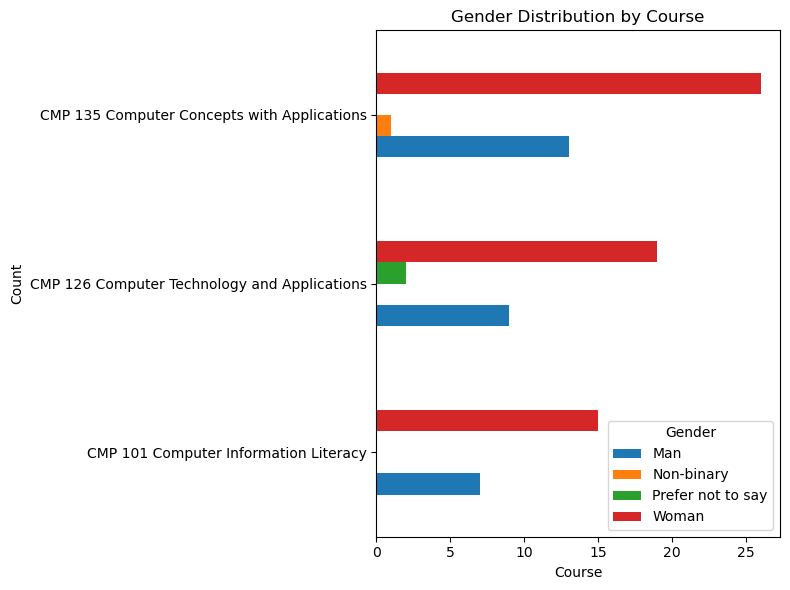

In [151]:
counts = q4.groupby(['Course', 'Gender']).size().unstack()

# Plotting
counts.plot(kind='barh', stacked=False, figsize=(8, 6))
plt.title("Gender Distribution by Course")
plt.xlabel("Course")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### The graph above shows a horizontal bargraph for the gender distribution

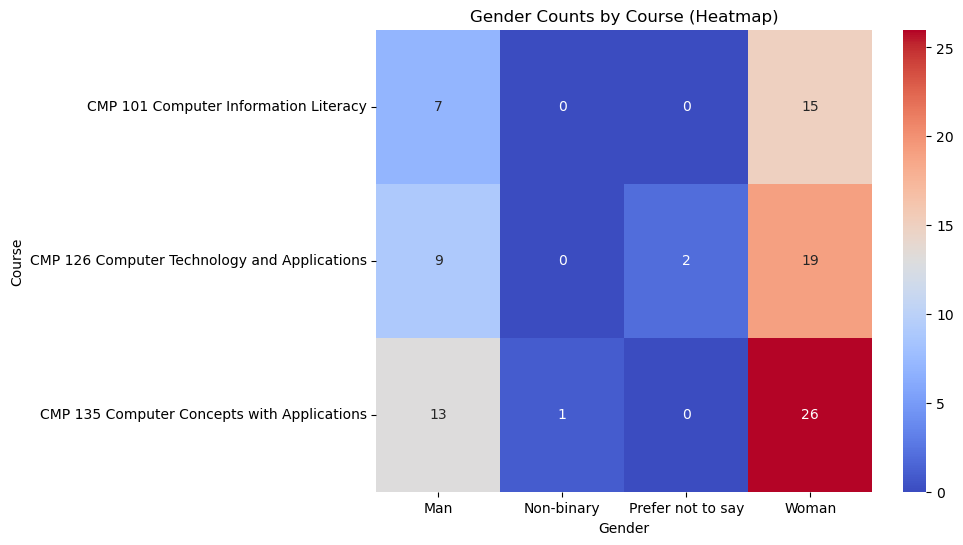

In [157]:
import seaborn as sns

# Create a pivot table for a heatmap
pivot = q4.pivot_table(index='Course', columns='Gender', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='d')
plt.title("Gender Counts by Course (Heatmap)")
plt.xlabel("Gender")
plt.ylabel("Course")
plt.show()



#### Above heat map shows the gender distribution across each given Courses students register for